In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,BatchNormalization
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.callbacks import EarlyStopping

2025-07-13 21:36:40.647803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752442601.002284      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752442601.101566      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=5,              
    restore_best_weights=True
)

In [27]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/aiderdata/AIDER",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/aiderdata/AIDER",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=64
)

Found 6433 files belonging to 5 classes.
Using 5147 files for training.
Found 6433 files belonging to 5 classes.
Using 1286 files for validation.


In [28]:
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

In [29]:
model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.25)) 

model.add(Dense(5,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_3             │ (None, 127, 127, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_4             │ (None, 62, 62, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_5             │ (None, 30, 30, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,468,805 (28.49 MB)

 Trainable params: 7,468,805 (28.49 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_ds,epochs=25,validation_data=val_ds,callbacks=[early_stop])

Epoch 1/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.5706 - loss: 1.3240 - val_accuracy: 0.6905 - val_loss: 0.9818
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.6725 - loss: 1.0344 - val_accuracy: 0.6905 - val_loss: 0.9014
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.6770 - loss: 0.9787 - val_accuracy: 0.6905 - val_loss: 0.8397
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.6806 - loss: 0.9452 - val_accuracy: 0.6967 - val_loss: 0.9286
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.6793 - loss: 0.9572 - val_accuracy: 0.7076 - val_loss: 0.8393
Epoch 6/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.6746 - loss: 0.9589 - val_accuracy: 0.6905 - val_loss: 0.8598
Epoch 7/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.6812 - loss: 0.9131 - val_accuracy: 0.6983 - val_loss: 0.8286
Epoch 8/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.6806 - loss: 0.9137 - val_accu

In [32]:
import cv2
import matplotlib.pyplot as plt

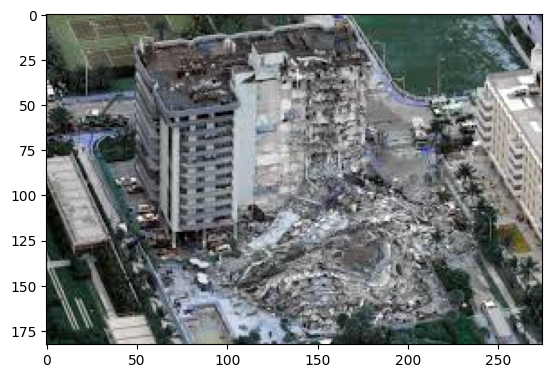

In [33]:
test_img=cv2.imread("/kaggle/input/collapse1/f4.jpg")
plt.imshow(test_img)

In [34]:
test_img=cv2.resize(test_img,(256,256))

In [35]:
test_input=test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


array([[0.19853778, 0.07761917, 0.18793413, 0.34232885, 0.19358003]],
      dtype=float32)